In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
# Linear SVM with Hinge Loss for Soft-Margin 

In [6]:
class SVM:
    def __init__(self,lr=0.001,alpha=0.01,n_iters=1000):
        self.lr = lr
        self.alpha = alpha
        self.n_iters = n_iters
        self.cls_map = None
        self.w = None
        self.b = None
    def _init_weights_bias(self,X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
    def _get_cls_map(self,y):
        return np.where(y<=0,-1,1)

    def satisfy_constraint(self,x,idx):
        linear_model = np.dot(x,self.w)+self.b
        return self.cls_map[idx]*linear_model >= 1

    def _get_gradient_descent(self,constrain,x,idx):
        if(constrain):
            dw = self.alpha*self.w
            db = 0
        else:
            dw = self.alpha*self.w - np.dot(self.cls_map[idx],x)
            db = - self.cls_map[idx]
        return dw,db
    
    def update_weights_bias(self,dw,db):
        self.w -= self.lr*dw
        self.b -= self.lr*db

    def fit(self,X,y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)
        for i in range(self.n_iters):
            for idx,x in enumerate(X):
                constrain = self.satisfy_constraint(x,idx)
                dw,db = self._get_gradient_descent(constrain,x,idx)
                self.update_weights_bias(dw,db)
    def predict(self,X):
        estimate = np.dot(X,self.w)+self.b
        prediction = np.sign(estimate)

        return np.where(prediction==-1,0,1)

In [15]:
X,y = make_blobs(n_samples=250,n_features=2,centers=2,cluster_std=1.05,random_state=0)

# print(X.shape,y.shape)
# print(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [17]:
# Preiction
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [12]:
def accuracy_score(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true))

In [19]:
print(accuracy_score(y_test, predictions))

0.98


In [22]:
print(clf.w)

[ 0.35981332 -1.47207545]


In [39]:
import matplotlib.pyplot as plt
# plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

# x[0] : x, x[1] : y
# w[0] * x[0] + w[1] * x[1] + b = offset
# w[1] * x[1] = offset - w[0] * x[0] - b
# x[1] = (offset - w[0] * x[0] - b) / w[1]

In [29]:
print(X_train.shape)

(200, 2)


-1.7043692280792877
4.886302776624637
1.731395802177331
3.3423265070525923


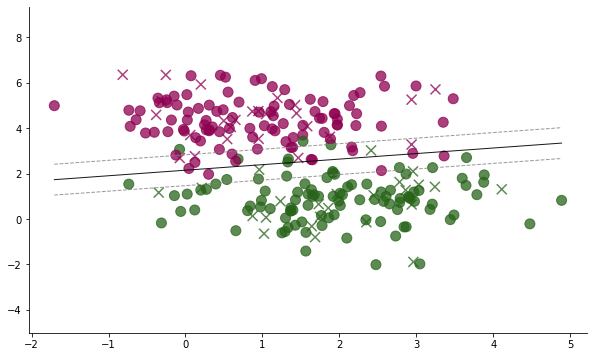

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.set_cmap('PiYG')

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

print(x0_1)
print(x0_2)

print(x1_1)
print(x1_2)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
     ax.spines[spine].set_visible(False)

plt.show()